In [1]:
!wget https://ftp.ensemblgenomes.ebi.ac.uk/pub/plants/release-60/fasta/triticum_aestivum/dna/Triticum_aestivum.IWGSC.dna.toplevel.fa.gz
!wget https://ftp.ensemblgenomes.ebi.ac.uk/pub/plants/release-60/gff3/triticum_aestivum/Triticum_aestivum.IWGSC.60.gff3.gz

--2024-12-23 12:37:41--  https://ftp.ensemblgenomes.ebi.ac.uk/pub/plants/release-60/fasta/triticum_aestivum/dna/Triticum_aestivum.IWGSC.dna.toplevel.fa.gz
Resolving ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)... 193.62.193.161
Connecting to ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)|193.62.193.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4294990673 (4.0G) [application/x-gzip]
Saving to: ‘Triticum_aestivum.IWGSC.dna.toplevel.fa.gz’

Triticum_aestivum.I 100%[===================>]   4.00G   236KB/s    in 5h 3m   

2024-12-23 17:40:47 (231 KB/s) - ‘Triticum_aestivum.IWGSC.dna.toplevel.fa.gz’ saved [4294990673/4294990673]

--2024-12-23 17:40:47--  https://ftp.ensemblgenomes.ebi.ac.uk/pub/plants/release-60/gff3/triticum_aestivum/Triticum_aestivum.IWGSC.60.gff3.gz
Resolving ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)... 193.62.193.161
Connecting to ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)|193.

In [2]:
!gzip -d Triticum_aestivum.IWGSC.dna.toplevel.fa.gz

In [3]:
!gzip -d Triticum_aestivum.IWGSC.60.gff3.gz

In [6]:
fn = "Triticum_aestivum.IWGSC.dna.toplevel.fa"
bulk = open(fn).read()

In [8]:
dicFasta = {}
for each in bulk.split('>')[1:]:
    name = each.split('\n')[0].split()[0]
    seq = ''.join(each.split('\n')[1:])
    dicFasta[name] = seq
### Make df for GFF3
import pandas as pd
df_gff = pd.read_csv('./Triticum_aestivum.IWGSC.60.gff3',sep='\t',header=None, comment='#')

In [12]:
df_gff_mRNA = df_gff[df_gff[2] == 'mRNA']

In [13]:
df_gff_mRNA

,0,1,2,3,4,5,6,7,8
35,1A,IWGSC,mRNA,40098,70338,.,-,.,ID=transcript:TraesCS1A02G000100.1;Parent=gene...
66,1A,IWGSC,mRNA,70239,89245,.,+,.,ID=transcript:TraesCS1A02G000200.1;Parent=gene...
91,1A,IWGSC,mRNA,95906,104903,.,+,.,ID=transcript:TraesCS1A02G000300.1;Parent=gene...
104,1A,IWGSC,mRNA,102794,122504,.,+,.,ID=transcript:TraesCS1A02G000400.1;Parent=gene...
145,1A,IWGSC,mRNA,149490,154559,.,-,.,ID=transcript:TraesCS1A02G000500.1;Parent=gene...
...,...,...,...,...,...,...,...,...,...
1957709,Un,IWGSC,mRNA,478410340,478410699,.,-,.,ID=transcript:TraesCSU02G272776.1;Parent=gene:...
1957716,Un,IWGSC,mRNA,478901536,478902039,.,-,.,ID=transcript:TraesCSU02G272807.1;Parent=gene:...
1957720,Un,IWGSC,mRNA,478934578,478934940,.,+,.,ID=transcript:TraesCSU02G272800.1;Parent=gene:...
1957727,Un,IWGSC,mRNA,479850130,479850488,.,+,.,ID=transcript:TraesCSU02G272900.1;Parent=gene:...


In [16]:
df_gff_mRNA['transcript_name'] = df_gff_mRNA[8].apply(lambda x : dict([i.split('=') for i in x.split(';')])['ID'].split(':')[1])

/tmp/ipykernel_3369/2387914023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gff_mRNA['transcript_name'] = df_gff_mRNA[8].apply(lambda x : dict([i.split('=') for i in x.split(';')])['ID'].split(':')[1])


In [17]:
df_gff_mRNA

,0,1,2,3,4,5,6,7,8,transcript_name
35,1A,IWGSC,mRNA,40098,70338,.,-,.,ID=transcript:TraesCS1A02G000100.1;Parent=gene...,TraesCS1A02G000100.1
66,1A,IWGSC,mRNA,70239,89245,.,+,.,ID=transcript:TraesCS1A02G000200.1;Parent=gene...,TraesCS1A02G000200.1
91,1A,IWGSC,mRNA,95906,104903,.,+,.,ID=transcript:TraesCS1A02G000300.1;Parent=gene...,TraesCS1A02G000300.1
104,1A,IWGSC,mRNA,102794,122504,.,+,.,ID=transcript:TraesCS1A02G000400.1;Parent=gene...,TraesCS1A02G000400.1
145,1A,IWGSC,mRNA,149490,154559,.,-,.,ID=transcript:TraesCS1A02G000500.1;Parent=gene...,TraesCS1A02G000500.1
...,...,...,...,...,...,...,...,...,...,...
1957709,Un,IWGSC,mRNA,478410340,478410699,.,-,.,ID=transcript:TraesCSU02G272776.1;Parent=gene:...,TraesCSU02G272776.1
1957716,Un,IWGSC,mRNA,478901536,478902039,.,-,.,ID=transcript:TraesCSU02G272807.1;Parent=gene:...,TraesCSU02G272807.1
1957720,Un,IWGSC,mRNA,478934578,478934940,.,+,.,ID=transcript:TraesCSU02G272800.1;Parent=gene:...,TraesCSU02G272800.1
1957727,Un,IWGSC,mRNA,479850130,479850488,.,+,.,ID=transcript:TraesCSU02G272900.1;Parent=gene:...,TraesCSU02G272900.1


In [18]:
# 역상보 서열 함수 정의
def reverse_complement(seq):
    d = {"A": "T", "T": "A", "G": "C", "C": "G", "N": "N"}
    return ''.join([d[base] for base in seq[::-1]])

#  프로모터 서열 추출 함수 정의
def get_promoter_seq(chromosome_name, length_promoter, mRNA_left, mRNA_right, strand):
    if strand == '+':
        left = max(mRNA_left - length_promoter - 1, 0)  # 염색체 시작점 이하로 내려가지 않도록 제한
        right = mRNA_left - 1
        promoter_seq = dicFasta[chromosome_name][left:right]
    else:
        left = mRNA_right
        right = mRNA_right + length_promoter
        promoter_seq = reverse_complement(dicFasta[chromosome_name][left:right])
    return promoter_seq


In [19]:
df_gff_mRNA['Seq'] = df_gff_mRNA.apply(lambda x : get_promoter_seq(str(x[0]), 1000, int(x[3]), int(x[4]), x[6]), axis=1)
with open('promoter.fa','w') as f:
  for transcript_name,seq in df_gff_mRNA[['transcript_name','Seq']].values:
    print(f'>{transcript_name}',file=f)
    print(seq,file=f)

/tmp/ipykernel_3369/2685667485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gff_mRNA['Seq'] = df_gff_mRNA.apply(lambda x : get_promoter_seq(str(x[0]), 1000, int(x[3]), int(x[4]), x[6]), axis=1)


In [20]:
df_gff_mRNA.head()

,0,1,2,3,4,5,6,7,8,transcript_name,Seq
35,1A,IWGSC,mRNA,40098,70338,.,-,.,ID=transcript:TraesCS1A02G000100.1;Parent=gene...,TraesCS1A02G000100.1,CTAAACCCAGCTCACGTTCCCTATTGGTGGGTGAACAATCCAACAC...
66,1A,IWGSC,mRNA,70239,89245,.,+,.,ID=transcript:TraesCS1A02G000200.1;Parent=gene...,TraesCS1A02G000200.1,TGATCTTCTGTGAAGGGTTTGAGTTGGAGCACGCCTGTCGGGACTC...
91,1A,IWGSC,mRNA,95906,104903,.,+,.,ID=transcript:TraesCS1A02G000300.1;Parent=gene...,TraesCS1A02G000300.1,CAAGAGAGTCAAATAGTGCTTGAAATTATCGGGAGGGAAGCGGATG...
104,1A,IWGSC,mRNA,102794,122504,.,+,.,ID=transcript:TraesCS1A02G000400.1;Parent=gene...,TraesCS1A02G000400.1,GCCGTTTAGGCGACGAAAGTTTGAGGCAATAATAGGTCTGTGATGC...
145,1A,IWGSC,mRNA,149490,154559,.,-,.,ID=transcript:TraesCS1A02G000500.1;Parent=gene...,TraesCS1A02G000500.1,CGCGTGGGTCACTCCCACAACAACAGAGTTATGGGTGCAACGATTT...


In [ ]:
import time

# makeblastdb 실행 시간 측정
print("Running makeblastdb...")
start_time = time.time()
!makeblastdb -in promoter.fa -dbtype nucl
elapsed_time_makeblastdb = time.time() - start_time
print(f"makeblastdb completed in {elapsed_time_makeblastdb:.2f} seconds.\n")

In [ ]:
# blastn 실행 시간 측정
print("Running blastn...")
start_time = time.time()
!blastn -task blastn -word_size 6 -query promoter.fa -db promoter.fa -out promoter.outfmt7 -outfmt 7
elapsed_time_blastn = time.time() - start_time
print(f"blastn completed in {elapsed_time_blastn:.2f} seconds.")

Running makeblastdb...


Building a new DB, current time: 12/23/2024 20:18:23
New DB name:   /data/Projects/study/GNU/promoter.fa
New DB title:  promoter.fa
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Ignoring sequence 'lcl|65732' as it has no sequence data
Adding sequences from FASTA; added 133743 sequences in 2.34607 seconds.
makeblastdb completed in 3.40 seconds.

Running blastn...


In [28]:
# BLAST 결과를 데이터프레임으로 로드
blast_file = "promoter.outfmt7"
df_blast = pd.read_csv(blast_file, sep='\t', comment='#', header=None)

In [30]:
# 필요한 열 이름 추가
df_blast.columns = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length", 
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "e-value", "bit score"
]

# 밀은 애기장대보다 유전체 크기가 더 크다
* 기존의 조건으로 했을 경우, 필터링 된 values들이 존재하지 않는다.
* 따라서, alignment length < 20 으로 한다. 

In [44]:
# 필터링 조건 설정
m1 = df_blast['alignment length'] < 20  # 정렬 길이가 16 미만
m2 = df_blast['% identity'] > 95        # 일치율이 95% 초과
m = m1 & m2                             # 두 조건 모두를 만족하는 경우
df_blast_sub = df_blast[m]  

In [45]:
df_blast_sub

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,e-value,bit score
40,TraesCS1A02G000100.1,TraesCS6B02G321200.1,100.0,18,0,0,949,966,237,220,8.7,33.7
44,TraesCS1A02G000100.1,TraesCS1A02G272100.2,100.0,18,0,0,13,30,81,98,8.7,33.7
45,TraesCS1A02G000100.1,TraesCS1A02G272100.1,100.0,18,0,0,13,30,81,98,8.7,33.7
271,TraesCS1A02G000300.1,TraesCS5B02G254300.1,100.0,19,0,0,310,328,24,42,2.5,35.6
293,TraesCS1A02G000300.1,TraesCS3B02G394300.1,100.0,18,0,0,130,147,192,209,8.7,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...
340319,TraesCS1A02G053100.1,TraesCS6D02G402200.1,100.0,18,0,0,325,342,798,815,8.7,33.7
340323,TraesCS1A02G053100.1,TraesCS6D02G388000.1,100.0,18,0,0,460,477,405,422,8.7,33.7
340328,TraesCS1A02G053100.1,TraesCS6A02G417000.1,100.0,18,0,0,325,342,790,807,8.7,33.7
340333,TraesCS1A02G053100.1,TraesCS5D02G516900.1,100.0,18,0,0,698,715,695,712,8.7,33.7


In [46]:
dicFasta_promoter = {}
fn = 'promoter.fa'
bulk = open(fn).read()
for each in bulk.split('>')[1:]:
  name = each.split('\n')[0].split()[0]
  seq  = ''.join(each.split('\n')[1:])
  dicFasta_promoter[name] = seq

In [47]:
# 데이터 추출 및 처리
data = []
for n, each in enumerate(df_blast_sub[['query acc.ver', 'subject acc.ver', 'q. start', 'q. end', 's. start', 's. end']].values):
    q, s, qs, qe, ss, se = each
    promoterBlockQ_name = f"{q}_{qs}_{qe}"
    promoterBlockS_name = f"{s}_{ss}_{se}"

    # Query 프로모터 블록 추출
    if qs > qe:
        promoterBlockQ = reverse_complement(dicFasta_promoter[q][qe - 1:qs])           # query 서열이 역방향 정렬일 경우
    else:
        promoterBlockQ = dicFasta_promoter[q][qs - 1:qe]                                       # query 서열이 정방향 정렬일 경우

    # Subject 프로모터 블록 추출
    if ss > se:
        promoterBlockS = reverse_complement(dicFasta_promoter[s][se - 1:ss])
    else:
        promoterBlockS = dicFasta_promoter[s][ss - 1:se]

    # 딕셔너리 생성
    dic = {
        "promoterBlockQ_name": promoterBlockQ_name,
        "promoterBlockS_name": promoterBlockS_name,
        "promoterBlockQ": promoterBlockQ,
        "promoterBlockS": promoterBlockS,
    }
    data.append(dic)

# % identitiy 95이상에서 query와 subject를 비교하였기 때문에 promoterBlockQ와  promoterBlockS는 거의 동일하다

In [49]:
# 결과 데이터프레임 생성
df_promoter_sequences = pd.DataFrame(data)
df_promoter_sequences  

,promoterBlockQ_name,promoterBlockS_name,promoterBlockQ,promoterBlockS
0,TraesCS1A02G000100.1_949_966,TraesCS6B02G321200.1_237_220,GAGCAACACGAGCAATCT,GAGCAACACGAGCAATCT
1,TraesCS1A02G000100.1_13_30,TraesCS1A02G272100.2_81_98,CACGTTCCCTATTGGTGG,CACGTTCCCTATTGGTGG
2,TraesCS1A02G000100.1_13_30,TraesCS1A02G272100.1_81_98,CACGTTCCCTATTGGTGG,CACGTTCCCTATTGGTGG
3,TraesCS1A02G000300.1_310_328,TraesCS5B02G254300.1_24_42,GTTCTGAAACCTGGGATGC,GTTCTGAAACCTGGGATGC
4,TraesCS1A02G000300.1_130_147,TraesCS3B02G394300.1_192_209,GTGCCGGCGGCCAAAGCC,GTGCCGGCGGCCAAAGCC
...,...,...,...,...
5993,TraesCS1A02G053100.1_325_342,TraesCS6D02G402200.1_798_815,TTGTGTGGCATTTCTTTT,TTGTGTGGCATTTCTTTT
5994,TraesCS1A02G053100.1_460_477,TraesCS6D02G388000.1_405_422,AAGAAAGAAAGAAAGCAA,AAGAAAGAAAGAAAGCAA
5995,TraesCS1A02G053100.1_325_342,TraesCS6A02G417000.1_790_807,TTGTGTGGCATTTCTTTT,TTGTGTGGCATTTCTTTT
5996,TraesCS1A02G053100.1_698_715,TraesCS5D02G516900.1_695_712,GATTTGTTCAAACCATGC,GATTTGTTCAAACCATGC


In [51]:
# k-mer 계산 함수 정의
def kmer_calculator(seq, k):
    """서열에서 k-mer 빈도를 계산."""
    dic = {}
    for n in range(len(seq) - k + 1):
        kmer = seq[n:n + k]
        dic[kmer] = dic.get(kmer, 0) + 1
    return dic

# k=7로 빈도수 계산했을 경우

In [62]:
# k-mer 계산
df_promoter_sequences['KmerQ'] = df_promoter_sequences['promoterBlockQ'].apply(lambda x: kmer_calculator(x, 7))
df_promoter_sequences['KmerS'] = df_promoter_sequences['promoterBlockS'].apply(lambda x: kmer_calculator(x, 7))

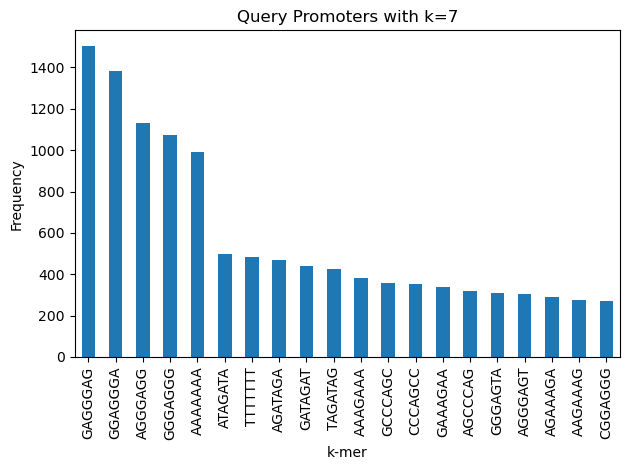

In [63]:
import matplotlib.pyplot as plt

# k=7 상위 20개 k-mer 빈도 시각화
top_kmers_k7 = pd.DataFrame(list(df_promoter_sequences['KmerQ'])).sum().sort_values(ascending=False).head(20)

# 그래프 생성
top_kmers_k7.plot(kind='bar', title='Query Promoters with k=7')

# 그래프 저장
plt.xlabel('k-mer')
plt.ylabel('Frequency')
plt.tight_layout()  # 레이아웃 정리
plt.savefig('top_20_kmers_k7.png', dpi=300)  # 그래프를 PNG 형식으로 저장
plt.show()  # 화면에 그래프 출력


# k=8로 빈도수 계산 했을 경우

In [64]:
# k-mer 계산
df_promoter_sequences['KmerQ'] = df_promoter_sequences['promoterBlockQ'].apply(lambda x: kmer_calculator(x, 8))
df_promoter_sequences['KmerS'] = df_promoter_sequences['promoterBlockS'].apply(lambda x: kmer_calculator(x, 8))

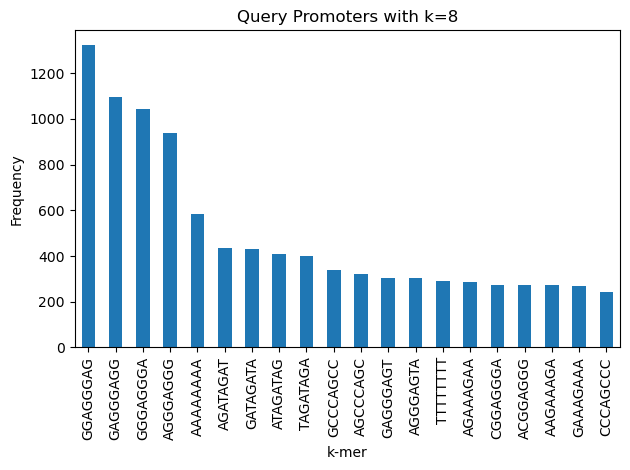

In [65]:
import matplotlib.pyplot as plt

# k=8 상위 20개 k-mer 빈도 시각화
top_kmers_k8 = pd.DataFrame(list(df_promoter_sequences['KmerQ'])).sum().sort_values(ascending=False).head(20)

# 그래프 생성
top_kmers_k8.plot(kind='bar', title='Query Promoters with k=8')

# 그래프 저장
plt.xlabel('k-mer')
plt.ylabel('Frequency')
plt.tight_layout()  # 레이아웃 정리
plt.savefig('top_20_kmers_k8.png', dpi=300)  # 그래프를 PNG 형식으로 저장
plt.show()  # 화면에 그래프 출력


# Query와 Subject의 kmer 서열은 동일하다

<AxesSubplot:>

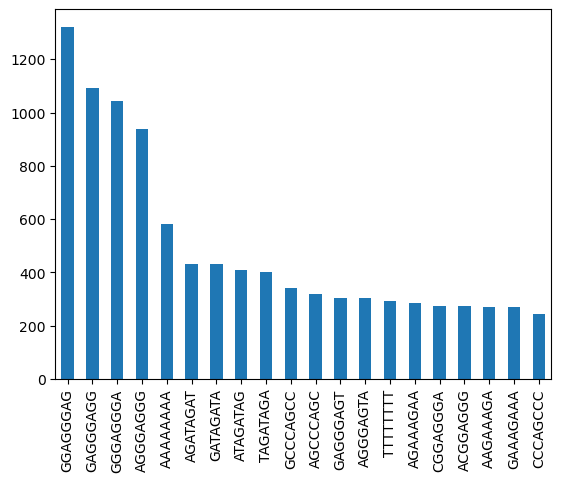

In [66]:
pd.DataFrame(list(df_promoter_sequences['KmerQ'])).sum().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:>

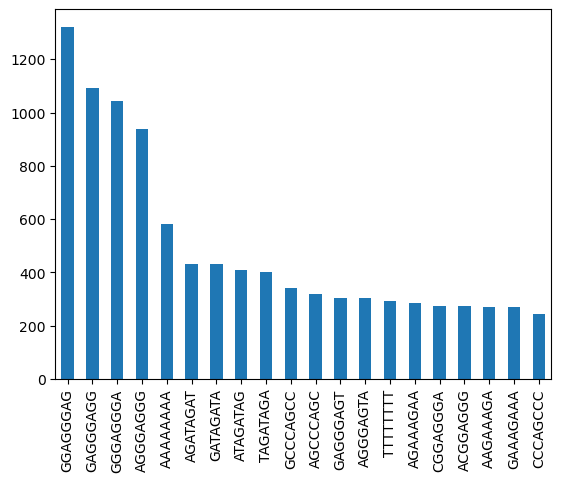

In [67]:
pd.DataFrame(list(df_promoter_sequences['KmerS'])).sum().sort_values(ascending=False).head(20).plot(kind='bar')